### Importing libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sktime as sk
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sktime.forecasting.compose import make_reduction
from sktime.transformations.series.detrend import Detrender,Deseasonalizer
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.ets import AutoETS
from sktime.performance_metrics.forecasting import MeanRelativeAbsoluteError
from sktime.performance_metrics.forecasting import MeanSquaredScaledError
from sktime.performance_metrics.forecasting import GeometricMeanAbsoluteError
from codes import *
rmsse = MeanSquaredScaledError(square_root=True)
gmae = GeometricMeanAbsoluteError()

### Loading dataset from data folder and accessing the data variables and then reshaping it

In [9]:
train_data = np.load('data/METR-LA/train.npz')
x_train = train_data['x']
y_train = train_data['y']
x_train = reshape_func(x_train)
y_train = reshape_func(y_train)
y_train = y_train[:,0]
y_train = pd.DataFrame(y_train)

### Here we load the same variables from the test data and reshape them according to the same process for us to use.

In [10]:
test_data = np.load('data/METR-LA/test.npz')
x_test = test_data['x']
y_test = test_data['y']
x_test = reshape_func(x_test)
y_test = reshape_func(y_test)
y_test = y_test[:,0]
y_test =  pd.DataFrame(y_test)

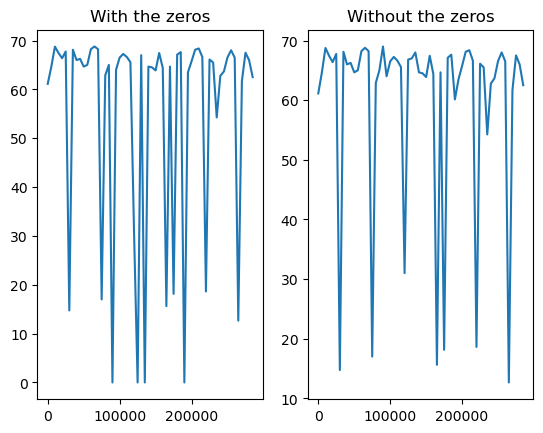

In [18]:
fig,axis = plt.subplots(1,2)
axis[0].plot(y_train[0::5000])
axis[0].set_title("With the zeros")

axis[1].plot(ytrain_zfill[0::5000])
axis[1].set_title("Without the zeros")

plt.show()

### Here we try some SKTIME basic models

In [33]:
[smape1,rmsse1,y_pred1,gmae1] = model(y_train,y_test,ThetaForecaster(deseasonalize = False),False)
print("SMAPE",smape1)
print("RMSSE",rmsse1)
print("GMAE",gmae1)
#plot_series(y_pred1[0::1000],y_test[0::1000],labels = ["y_pred","y_test"])

SMAPE 0.4623273922087865
RMSSE 3.400567499857999
GMAE 5.884124621799286


### To reduce error due to zero speeds, let's make some changes to the training and testing data


In [34]:
ytrain_zfill = fillzeros(y_train)
ytest_zfill = fillzeros(y_test)

[smape2,rmsse2,y_pred2,gmae2] = model(ytrain_zfill,ytest_zfill,ThetaForecaster(deseasonalize=False),False)
print("SMAPE",smape2)
print("RMSSE",rmsse2)
print("GMAE",gmae2)
#plot_series(y_pred2[0::1000],ytest_zfill[0::1000],labels = ["y_pred","y_test"])

SMAPE 0.23344318815093304
RMSSE 4.222400160508768
GMAE 3.599857503905193


### We try to remove the trend and seasonality

In [35]:
[smape3,rmsse3,y_pred3,gmae3] = model(ytrain_zfill,ytest_zfill,ThetaForecaster(deseasonalize=False),True)
print("SMAPE with zeros filled",smape3)
print("RMSSE with zeros filled",rmsse3)
print("GMAE with zeros filled",gmae3)
#plot_series(y_pred3[0::1000],ytest_zfill[0::1000],labels = ["y_pred","y_test"])


SMAPE with zeros filled 0.23310098595581893
RMSSE with zeros filled 4.22177621952297
GMAE with zeros filled 3.578403807622186


In [36]:
[smape4,rmsse4,y_pred4,gmae4] = model(y_train,y_test,ThetaForecaster(deseasonalize=False),True)
print("SMAPE without zeros filled",smape4)
print("RMSSE without zeros filled",rmsse4)
print("GMAE without zeros filled",gmae4)
#plot_series(y_pred4[0::1000],y_test[0::1000],labels = ["y_pred","y_test"])

SMAPE without zeros filled 0.4542976714015673
RMSSE without zeros filled 3.4251156373340788
GMAE without zeros filled 5.50084865849662


### Now we are going to develop some more arima models

In [37]:
[smape5,rmsse5,y_pred5,gmae5] = model(y_train,y_test,ARIMA(),False)
print("SMAPE without zeros filled",smape5)
print("RMSSE without zeros filled",rmsse5)
print("GMAE without zeros filled",gmae5)
#plot_series(y_pred5[0::1000],y_test[0::1000],labels = ["y_pred","y_test"])

SMAPE without zeros filled 0.4552679626812311
RMSSE without zeros filled 3.4548592757460983
GMAE without zeros filled 5.083342262831682


In [38]:
[smape6,rmsse6,y_pred6,gmae6] = model(ytrain_zfill,ytest_zfill,ARIMA(),False)
print("SMAPE with zeros filled",smape6)
print("RMSSE with zeros filled",rmsse6)
print("GMAE with zeros filled",gmae6)
#plot_series(y_pred6[0::1000],ytest_zfill[0::1000],labels = ["y_pred","y_test"])

SMAPE with zeros filled 0.22235296163141757
RMSSE with zeros filled 4.07556469186814
GMAE with zeros filled 3.5029629196702428


## Now we apply autoETS models

In [39]:
[smape7,rmsse7,y_pred7,gmae7] = model(y_train,y_test,AutoETS(auto=True),False)
print("SMAPE without zeros filled",smape7)
print("RMSSE without zeros filled",rmsse7)
print("GMAE without zeros filled",gmae7)
#plot_series(y_pred7[0::1000],y_test[0::1000],labels = ["y_pred","y_test"])

D:\Anaconda\envs\dcrnn\lib\site-packages\sktime\forecasting\ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


SMAPE without zeros filled 0.45586453169911745
RMSSE without zeros filled 3.436791632232295
GMAE without zeros filled 5.429701622607496


In [40]:
[smape8,rmsse8,y_pred8,gmae8] = model(ytrain_zfill,ytest_zfill,AutoETS(auto=True),False)
print("SMAPE with zeros filled",smape8)
print("RMSSE with zeros filled",rmsse8)
print("GMAE with zeros filled",gmae8)
#plot_series(y_pred8[0::1000],ytest_zfill[0::1000],labels = ["y_pred","y_test"])

SMAPE with zeros filled 0.228328456568454
RMSSE with zeros filled 4.129464357714672
GMAE with zeros filled 3.698279405840531


In [ ]:
#regressors = [LinearRegression(),DecisionTreeRegressor(),GradientBoostingRegressor()]
#smape_reg = []
#rmsse_reg = []
#ypred_reg = []
#for i in regressors:
  #  forecaster = make_reduction(i,window_length=12,strategy="recursive")
 #   [smape1,rmsse1,yped1] = model(y_train,y_test,forecaster,False)
#    smape_reg.append(smape1)
#    rmsse_reg.append(rmsse1)
#    ypred_reg.append(ypred1)
    

In [ ]:
#forecaster = make_reduction(DecisionTreeRegressor())#, scitype="time-series-regressor")#strategy="recursive")
#forecaster.fit(yy_train)
#pred = forecaster.predict(fh)
#smape1 = smape(y_test,pred)
#rmsse1 = rmsse(y_test,pred,y_train=y_train)

In [41]:
#fh = ForecastingHorizon(y_test.index, is_relative=False)
#regressors = LinearRegression()
#forecaster = make_reduction(regressors,window_length=52,strategy="multioutput")
#forecaster.fit(y_train,fh)
#y_pred = forecaster.predict(fh)